<a href="https://colab.research.google.com/github/Gaukhar-ai/Thinkful_work/blob/master/RELU%2CSIGMOID%2CSEQUENTIAL_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#RELU - the most common one, that's the function of it for demonstration purposes

In [3]:
def relu(x):
  if x>0:
    return x
  else:
    return 0

In [4]:
#SIGMOID 

In [5]:
from math import exp


In [6]:
def sigmoid(x):
 return 1/(1+exp(-x))

In [7]:
x = np.linspace(-5, 5, 1010)
y= [relu(z) for z in x]

df = pd.DataFrame({'x':x, 'y':y})
df.head()
#pd.DataFrame(x).plot()

,x,y
0,-5.000000,0.0
1,-4.990089,0.0
2,-4.980178,0.0
3,-4.970268,0.0
4,-4.960357,0.0


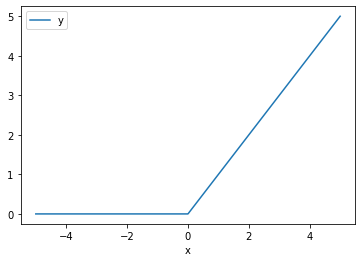

In [8]:
df.plot(x='x', y='y')

In [9]:
x = np.linspace(-5,5,101)
y = [sigmoid(z) for z in x]

df = pd.DataFrame({'x':x, 'y': y})
df

,x,y
0,-5.0,0.006693
1,-4.9,0.007392
2,-4.8,0.008163
3,-4.7,0.009013
4,-4.6,0.009952
...,...,...
96,4.6,0.990048
97,4.7,0.990987
98,4.8,0.991837
99,4.9,0.992608


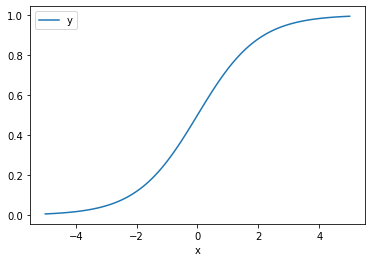

In [10]:
df.plot(x='x', y='y')

In [11]:
def leaky_relu(x):
  if x > 0:
    return x
  else:
    return 0.01*x

In [12]:
from math import exp


In [13]:
x = np.linspace(-5, 5, 1010)
y= [leaky_relu(z) for z in x]

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,-5.000000,-0.050000
1,-4.990089,-0.049901
2,-4.980178,-0.049802
3,-4.970268,-0.049703
4,-4.960357,-0.049604
...,...,...
1005,4.960357,4.960357
1006,4.970268,4.970268
1007,4.980178,4.980178
1008,4.990089,4.990089


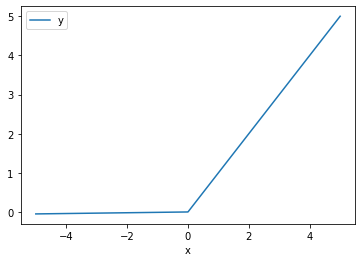

In [14]:
df.plot(x='x', y='y')

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [16]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }
# Target - Caesarian - {0 = No, 1 = Yes }

In [17]:
csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

In [18]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [19]:
csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              80 non-null     int64
 1   Delivery number  80 non-null     int64
 2   Delivery time    80 non-null     int64
 3   Blood Pressure   80 non-null     int64
 4   Heart Problem    80 non-null     int64
 5   Caesarian        80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [20]:
#not enough data, might not be reliable

In [21]:
c_dummy = pd.get_dummies(csection, columns=['Delivery number', 'Delivery time', 'Heart Problem'], drop_first=True)
#drop_first = True - redundancy, if 1 = 0, then 0 =1 same thing

In [22]:
x = c_dummy.drop(columns=['Caesarian'])
y = c_dummy['Caesarian'] #kesarevo sechenie

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

In [24]:
X_train.shape

(64, 8)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=50)

Epoch 1/100
2/2 [==============================] - 0s 81ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3996 - accuracy: 0.3906 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 8/100
2/2 [========

In [30]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50)

Epoch 1/1000
2/2 [==============================] - 0s 68ms/step - loss: 2.3421 - accuracy: 0.6094 - val_loss: 3.0412 - val_accuracy: 0.4375
Epoch 2/1000
2/2 [==============================] - 0s 9ms/step - loss: 2.2209 - accuracy: 0.6094 - val_loss: 2.8747 - val_accuracy: 0.4375
Epoch 3/1000
2/2 [==============================] - 0s 9ms/step - loss: 2.1027 - accuracy: 0.6094 - val_loss: 2.7112 - val_accuracy: 0.4375
Epoch 4/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.9854 - accuracy: 0.6094 - val_loss: 2.5479 - val_accuracy: 0.4375
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 1.8746 - accuracy: 0.6094 - val_loss: 2.3847 - val_accuracy: 0.4375
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.7540 - accuracy: 0.6094 - val_loss: 2.2257 - val_accuracy: 0.4375
Epoch 7/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.6401 - accuracy: 0.6094 - val_loss: 2.0706 - val_accuracy: 0.4375
Epoch 8/1000
2/2 [